# GPS pipeline and plotting

adapted from Louisa Maubachs BA thesis scripts

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 23 17:31:54 2023

@author: louisa

checking for the cleaned image where larger clusters are kicked out
"""

from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

In [10]:

#General data path for all files
GPS_data_path = "F:\\Cyprus_project_overview\\store_cyprus_project\\GPS_data"


#Exploration Session
exploration_session_1 = "Expl_1"

#give the information of the recording file one

GPS_data_path_date_1_1 = "05_09_2023"
GPS_data_path_recording_name_1_1 = "Expl_1_ET_1_2023-09-05_11-56-16_GPS"
GPS_data_path_pos_file_name_1_1 = "reach_rover_raw_202309050852"

#give the information of the recording file two 
GPS_data_path_date_1_2 = "05_09_2023"
GPS_data_path_recording_name_1_2 = "Expl_1_ET_2_2023-09-05_12-34-24_GPS"
GPS_data_path_pos_file_name_1_2 = "reach_rover_raw_202309050931"

#give the information of the recording file three 
GPS_data_path_date_1_3 = "05_09_2023"
GPS_data_path_recording_name_1_3 = "Expl_1_ET_3_2023-09-05_13-10-01_GPS"
GPS_data_path_pos_file_name_1_3 = "reach_rover_raw_202309051007"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_1_1_cal_1 = 3530
df_1_1_cal_2 = 6090
df_1_2_cal_1 = 2570
df_1_2_cal_2 = 5540
df_1_3_cal_1 = 2245
df_1_3_cal_2 = 5295

#----------------------------------------------------------------------

#Exploration Session
exploration_session_2 = "Expl_2"
 
#give the information of the recording file one

GPS_data_path_date_2_1 = "06_09_2023"
GPS_data_path_recording_name_2_1 = "Expl_2_ET_1_2023-09-06_10-36-37_GPS"
GPS_data_path_pos_file_name_2_1 = "reach_rover_raw_202309060733"

#give the information of the recording file two 
GPS_data_path_date_2_2 = "06_09_2023"
GPS_data_path_recording_name_2_2 = "Expl_2_ET_2_2023-09-06_11-08-36_GPS"
GPS_data_path_pos_file_name_2_2 = "reach_rover_raw_202309060807"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_2_1_cal_1 = 2592
df_2_1_cal_2 = 5595
df_2_2_cal_1 = 1901
df_2_2_cal_2 = 5012


#----------------------------------------------------------------------

#Exploration Session
exploration_session_3 = "Expl_3"

#give the information of the recording file one

GPS_data_path_date_3_1 = "06_09_2023"
GPS_data_path_recording_name_3_1 = "Expl_3_ET_1_2023-09-06_13-24-43_GPS"
GPS_data_path_pos_file_name_3_1 = "reach_rover_raw_202309061021"

#give the information of the recording file two 
GPS_data_path_date_3_2 = "06_09_2023"
GPS_data_path_recording_name_3_2 = "Expl_3_ET_2_2023-09-06_13-57-57_GPS"
GPS_data_path_pos_file_name_3_2 = "reach_rover_raw_202309061056"

#give the information of the recording file three 
GPS_data_path_date_3_3 = "06_09_2023"
GPS_data_path_recording_name_3_3 = "Expl_3_ET_3_2023-09-06_14-28-39_GPS"
GPS_data_path_pos_file_name_3_3 = "reach_rover_raw_202309061126"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_3_1_cal_1 = 2550
df_3_1_cal_2 = 5340
df_3_2_cal_1 = 2054
df_3_2_cal_2 = 4710
df_3_3_cal_1 = 1246
df_3_3_cal_2 = 4126

#---------------------------------------------------------------------

#Exploration Session
exploration_session_4 = "Expl_4"
 
#give the information of the recording file one

GPS_data_path_date_4_1 = "06_09_2023"
GPS_data_path_recording_name_4_1 = "Expl_4_ET_1_2023-09-06_18-31-33_GPS"
GPS_data_path_pos_file_name_4_1 = "reach_rover_raw_202309061529"

#give the information of the recording file two 
GPS_data_path_date_4_2 = "06_09_2023"
GPS_data_path_recording_name_4_2 = "Expl_4_ET_2_2023-09-06_18-57-24_GPS"
GPS_data_path_pos_file_name_4_2 = "reach_rover_raw_202309061555"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_4_1_cal_1 = 1896
df_4_1_cal_2 = 4932
df_4_2_cal_1 = 1903
df_4_2_cal_2 = 4864

#----------------------------------------------------------------------

#Exploration Session
exploration_session_5 = "Expl_5"
 
#give the information of the recording file one

GPS_data_path_date_5_1 = "07_09_2023"
GPS_data_path_recording_name_5_1 = "Expl_5_ET_1_2023-09-07_18-17-19_GPS"
GPS_data_path_pos_file_name_5_1 = "reach_rover_raw_202309071514"

#give the information of the recording file two 
GPS_data_path_date_5_2 = "07_09_2023"
GPS_data_path_recording_name_5_2 = "Expl_5_ET_2_2023-09-07_18-48-26_GPS"
GPS_data_path_pos_file_name_5_2 = "reach_rover_raw_202309071546"

#calibration slicing excluding the calibration procedure -> only exploration phase 
df_5_1_cal_1 = 2522
df_5_1_cal_2 = 5246
df_5_2_cal_1 = 2214
df_5_2_cal_2 = 4682


In [11]:


###define all files 
#put together the information about the recording file 
GPS_data_1_1 = GPS_data_path + "\\" + GPS_data_path_date_1_1 + "\\" + GPS_data_path_recording_name_1_1 + "\\" + GPS_data_path_pos_file_name_1_1 + ".pos"

#put together the information about the recording file 2
GPS_data_1_2 = GPS_data_path + "\\" + GPS_data_path_date_1_2 + "\\" + GPS_data_path_recording_name_1_2 + "\\" + GPS_data_path_pos_file_name_1_2 + ".pos"

#put together the information about the recording files 3
GPS_data_1_3 = GPS_data_path + "\\" + GPS_data_path_date_1_3 + "\\" + GPS_data_path_recording_name_1_3 + "\\" + GPS_data_path_pos_file_name_1_3 + ".pos"

#put together the information about the recording file 
GPS_data_2_1 = GPS_data_path + "\\" + GPS_data_path_date_2_1 + "\\" + GPS_data_path_recording_name_2_1 + "\\" + GPS_data_path_pos_file_name_2_1 + ".pos"

#put together the information about the recording file 2
GPS_data_2_2 = GPS_data_path + "\\" + GPS_data_path_date_2_2 + "\\" + GPS_data_path_recording_name_2_2 + "\\" + GPS_data_path_pos_file_name_2_2 + ".pos"

#put together the information about the recording files 3
GPS_data_3_1 = GPS_data_path + "\\" + GPS_data_path_date_3_1 + "\\" + GPS_data_path_recording_name_3_1 + "\\" + GPS_data_path_pos_file_name_3_1 + ".pos"

#put together the information about the recording file 
GPS_data_3_2 = GPS_data_path + "\\" + GPS_data_path_date_3_2 + "\\" + GPS_data_path_recording_name_3_2 + "\\" + GPS_data_path_pos_file_name_3_2 + ".pos"

#put together the information about the recording file 2
GPS_data_3_3 = GPS_data_path + "\\" + GPS_data_path_date_3_3 + "\\" + GPS_data_path_recording_name_3_3 + "\\" + GPS_data_path_pos_file_name_3_3 + ".pos"

#put together the information about the recording files 3
GPS_data_4_1 = GPS_data_path + "\\" + GPS_data_path_date_4_1 + "\\" + GPS_data_path_recording_name_4_1 + "\\" + GPS_data_path_pos_file_name_4_1 + ".pos"

#put together the information about the recording file 
GPS_data_4_2 = GPS_data_path + "\\" + GPS_data_path_date_4_2 + "\\" + GPS_data_path_recording_name_4_2 + "\\" + GPS_data_path_pos_file_name_4_2 + ".pos"

#put together the information about the recording file 2
GPS_data_5_1 = GPS_data_path + "\\" + GPS_data_path_date_5_1 + "\\" + GPS_data_path_recording_name_5_1 + "\\" + GPS_data_path_pos_file_name_5_1 + ".pos"

#put together the information about the recording files 3
GPS_data_5_2 = GPS_data_path + "\\" + GPS_data_path_date_5_2 + "\\" + GPS_data_path_recording_name_5_2 + "\\" + GPS_data_path_pos_file_name_5_2 + ".pos"


#-----------------------------------------------------------------------------


#converting .pos file to dataframe
def pos_to_dataframe(file):
    """
    Converts .pos data to dataframe with timestamp, latitude, longitude and height

    """
    df = pd.read_table(file, sep="\s+", header=9, parse_dates={"Timestamp": [0, 1]})
    df = df.rename(
        columns={
            "Timestamp": "time",
            "longitude(deg)": "longitude",
            "latitude(deg)": "latitude",
        }
    )
    return df


# assign the dataframes outside of the function 
df_1_1 = pos_to_dataframe(GPS_data_1_1)
df_1_2 = pos_to_dataframe(GPS_data_1_2)
df_1_3 = pos_to_dataframe(GPS_data_1_3)
df_2_1 = pos_to_dataframe(GPS_data_2_1)
df_2_2 = pos_to_dataframe(GPS_data_2_2)
df_3_1 = pos_to_dataframe(GPS_data_3_1)
df_3_2 = pos_to_dataframe(GPS_data_3_2)
df_3_3 = pos_to_dataframe(GPS_data_3_3)
df_4_1 = pos_to_dataframe(GPS_data_4_1)
df_4_2 = pos_to_dataframe(GPS_data_4_2)
df_5_1 = pos_to_dataframe(GPS_data_5_1)
df_5_2 = pos_to_dataframe(GPS_data_5_2)

#concetenate all for plotting
df_all_uncleaned = pd.concat([df_1_1,
                              df_1_2,
                              df_1_3,
                              df_2_1,
                              df_2_2,
                              df_3_1,
                              df_3_2,
                              df_3_3,
                              df_4_1,
                              df_4_2,
                              df_5_1,
                              df_5_2
                              ],ignore_index=True)


#slice the dataframes by their calibration points end of cal1 and start of call
df_1_1_sliced = df_1_1[df_1_1_cal_1:df_1_1_cal_2]
df_1_2_sliced = df_1_2[df_1_2_cal_1:df_1_2_cal_2]
df_1_3_sliced = df_1_3[df_1_3_cal_1:df_1_3_cal_2]
df_2_1_sliced = df_2_1[df_2_1_cal_1:df_2_1_cal_2]
df_2_2_sliced = df_2_2[df_2_2_cal_1:df_2_2_cal_2]
df_3_1_sliced = df_3_1[df_3_1_cal_1:df_3_1_cal_2]
df_3_2_sliced = df_3_2[df_3_2_cal_1:df_3_2_cal_2]
df_3_3_sliced = df_3_3[df_3_3_cal_1:df_3_3_cal_2]
df_4_1_sliced = df_4_1[df_4_1_cal_1:df_4_1_cal_2]
df_4_2_sliced = df_4_2[df_4_2_cal_1:df_4_2_cal_2]
df_5_1_sliced = df_5_1[df_5_1_cal_1:df_5_1_cal_2]
df_5_2_sliced = df_5_2[df_5_2_cal_1:df_5_2_cal_2]



#----------------------------------------------------------------------------------
# Try out block for cleaning and interpolating 

def speed(df):
    
    """
    iterate through dataframe and calculate the distance from one timestamp to the next
    
    calculate the mean and median of the distances depending on the given Q values 
    
    build the new dataframe and include the column distance 
    
    

    """
    #create empty lists
    list_dist = []
    list_lat = []
    list_long = []
    list_time = []
    list_Q = []
    list_ns = []
    list_time_passed = []
    list_dist_div_time = []
    list_km_h = []
    list_flagged = []
    list_calibration = []
    
    #iterate through length of dataframe (-1 because you use i+1)
    for i, row in df.iloc[:len(df)-1].iterrows():
        #define points 
        point1 = df.latitude[i], df.longitude[i]
        point2 = df.latitude[i+1], df.longitude[i+1]
        #earth radius
        radius = 6371 #km 
        
        #define two points
        lat1, lon1 = point1
        lat2, lon2 = point2
        
        #Haversine distance formula 
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c
        e = d * 1000 # to give result in meters
        f = e * 100 # tp give result in centimeters
        
        #calculate the time passed from one to the next timestamp 
        t_timestamp = df.time[i+1] - df.time[i]
        #convert it to float (and milliseconds)
        t = t_timestamp.total_seconds() * 1000
        
        #divide distance by time passed
        dist_div_time = f/t        
        
        #calculate dist/time to from cm/ms to km/h
        speed_km_h = dist_div_time * 36
        
        #assign the flagged as false
        flagged = False
        
        #add calibration point for plotting 
        if i==1 or i==len(df)-2: 
            calibration = True
        else:
            calibration = False
            
        
                         
        
        #create result lists calculated distances, latitude, longitude
        list_dist.append(f)
        list_lat.append(df.latitude[i])
        list_long.append(df.longitude[i])
        list_time.append(df.time[i])
        list_Q.append(df.Q[i])
        list_ns.append(df.ns[i])
        list_time_passed.append(t)
        list_dist_div_time.append(dist_div_time)
        list_km_h.append(speed_km_h)
        list_flagged.append(flagged)
        list_calibration.append(calibration)
        
        
    #create pandas series 
    se_dist = pd.Series(list_dist, name = "distances")
    se_lat = pd.Series(list_lat, name = "latitude")
    se_long = pd.Series(list_long, name = "longitude")
    se_time = pd.Series(list_time, name = "time")
    se_Q = pd.Series(list_Q, name = "Q")
    se_ns = pd.Series(list_ns, name = "ns")
    se_time_passed = pd.Series(list_time_passed, name = "time_passed")
    se_dist_div_time = pd.Series(list_dist_div_time, name = "dist_time")
    se_km_h = pd.Series(list_km_h, name = "km_h")
    se_flagged = pd.Series(list_flagged, name = "flagged")
    se_calibration = pd.Series(list_calibration, name = "calibration")
    

    
    #create dataframe from series 
    df_distances = pd.concat([se_time, se_lat, se_long, se_dist, se_time_passed, se_dist_div_time, se_km_h, se_Q, se_ns, se_flagged, se_calibration], axis=1)
    
    return df_distances

     
# define the dataframes out of the function to further use it 
df_conc_speed_1_1 = speed(df_1_1_sliced)
df_conc_speed_1_2 = speed(df_1_2_sliced)
df_conc_speed_1_3 = speed(df_1_3_sliced)
df_conc_speed_2_1 = speed(df_2_1_sliced)
df_conc_speed_2_2 = speed(df_2_2_sliced)
df_conc_speed_3_1 = speed(df_3_1_sliced)
df_conc_speed_3_2 = speed(df_3_2_sliced)
df_conc_speed_3_3 = speed(df_3_3_sliced)
df_conc_speed_4_1 = speed(df_4_1_sliced)
df_conc_speed_4_2 = speed(df_4_2_sliced)
df_conc_speed_5_1 = speed(df_5_1_sliced)
df_conc_speed_5_2 = speed(df_5_2_sliced)

#concat the dataframes with the speed of all recording sessions
df_concated_speed = pd.concat([df_conc_speed_1_1,
                               df_conc_speed_1_2,
                               df_conc_speed_1_3,
                               df_conc_speed_2_1,
                               df_conc_speed_2_2,
                               df_conc_speed_3_1,
                               df_conc_speed_3_2,
                               df_conc_speed_3_3,
                               df_conc_speed_4_1,
                               df_conc_speed_4_2,
                               df_conc_speed_5_1,
                               df_conc_speed_5_2
                               ], ignore_index=True)

#---------------------------------------------------------------------------
def flag_consecutive_outliers(df, consecutive_limit=150): 
    """
    this function checks for consecutive outliers which would not pass the set 
    thresholds regarding speed, Q value, number of satellites 
    
    if there are parts of the data with consecutive 150 outlier rows, adding up
    to 30 seconds of recording, those parts are flagged, to be skipped later
    
    """
    count = 0
    flag = False
    flagged_indices = []

    for i in range(len(df)):
        if df['Q'][i] == 5 or df["ns"][i] < 5 or df["km_h"][i] > 6:
            count += 1
            if count >= consecutive_limit:
                if not flag:
                    flag = True
                    start_index = i - count + 1
                flagged_indices.extend(range(start_index, i + 1))
        else:
            count = 0
            flag = False

    df['flagged'] = False
    df.loc[flagged_indices, 'flagged'] = True

    return df


df_flagged = flag_consecutive_outliers(df_concated_speed)


#--------------------------------------------------------------------------
def clean(df):
    """
    cleanes the given dataframe by requirements
    sets values to nan, if requirements are met
    
    """
    flagged_indices = df[df['flagged']].index  # Get indices of flagged rows
   
     
    for i in range(0,len(df)-1):
        # Skip rows with flagged indices
        if i in flagged_indices:
            continue
        
        #cleaning
        if df.Q[i] == 5 or df.km_h[i] >= 6 or df.ns[i] < 5:
            # Set specific columns to None when Q is 5
            df.loc[i, 'latitude'] = np.nan
            df.loc[i, 'longitude'] = np.nan
            df.loc[i, "distances"] = np.nan
            df.loc[i, "time_passed"] = np.nan
            df.loc[i, "dist_time"] = np.nan
            df.loc[i, "km_h"] = np.nan
    
    return df

#assign outside function
df_conc_clean = clean(df_flagged)
#make copy such that original df is not changed when interpolated
df_conc_clean_copy = df_conc_clean.copy()

#----------------------------------------------------------------------------

def interpol(df):
    """
    linearly interpolates the given dataframe 
    
    """
    df['latitude'] = df['latitude'].interpolate(method='linear')
    df['longitude'] = df['longitude'].interpolate(method='linear')
    
    return df


#assign outside function, use copy
df_interpol = interpol(df_conc_clean_copy)


#-----------------------------------------------------------------------------------


In [60]:


#give the information on filepath of map image 
filepath_map_general = "F:\\Cyprus_project_overview\\data\\maps"
filename_map = "Limassol_grey2"

#put together the filepath name
filepath_map = filepath_map_general + "\\" + filename_map + ".jpg"
# #----------------------------------------------------------------------------------

#filepath to save the output image with cleaned dataframe
filepath_img_general = "F:\\Cyprus_project_overview\\data\\analysis\\gps\\louisasScript"
filename_img_cleaned = "cluster_cleaned"

#put together the filepath name
filepath_img_save_cleaned = filepath_img_general + "\\" + filename_img_cleaned + ".png"


# #----------------------------------------------------------------------------------

#filepath to save the output image with cleaned dataframe
filename_img_interpol = "cluster_interpolated"

#put together the filepath name
filepath_img_save_interpol = filepath_img_general + "\\" + filename_img_interpol + ".png"

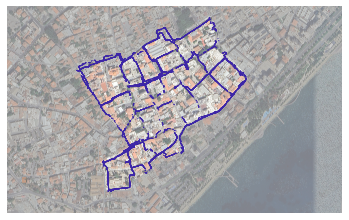

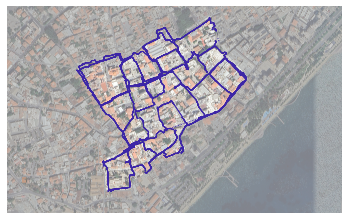

In [61]:


#----------------------------------------------------------------------------------
###Plot the cleaned dataframe 

# Load an image from file
img = Image.open(filepath_map) 

#assign the cleaned dataframe 
df = df_conc_clean
df_name = "df_conc_clean" # for printing later on plot


# pixel values map picture 
pixel_width = 8192  # Width of the image in pixels
pixel_height = 5051  # Height of the image in pixels


# latitude and longitude of the edges of the map image 
corner_lat_top = 34.67751  # Latitude of the top edge of the map
corner_lat_bottom = 34.671293  # Latitude of the bottom edge of the map
corner_lon_left = 33.037658  # Longitude of the left edge of the map
corner_lon_right =  33.049882 # Longitude of the right edge of the map

# Calculate differences in latitude and longitude
delta_lat = corner_lat_top - corner_lat_bottom
delta_lon = corner_lon_right - corner_lon_left

# Calculate conversion ratio from degrees to pixels
lat_to_pixel = pixel_height / delta_lat
lon_to_pixel = pixel_width / delta_lon

# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['longitude'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['latitude']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image

#Mask for flagged values - flagges means over 30 seconds outlier 
flagged_mask = df['flagged']

# Mask for calibration points
calibration_mask = df['calibration']

plt.imshow(img, alpha=0.6)


# Plot flagged points in lime
plt.scatter(df[flagged_mask]['x'], df[flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# Plot non-flagged points in blue
plt.scatter(df[~flagged_mask]['x'], df[~flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

#plt.title("All Exploration Sessions" + "\n" + "cleaned and flagged consecutive outliers", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name + " and calibration points", fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save_cleaned, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()


#----------------------------------------------------------------------------------
###Plot the interpolated dataframe 

# Load an image from file
img = Image.open(filepath_map) 

#assign the cleaned dataframe 
df = df_interpol
df_name = "df_interpol" # for printing later on plot


# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['longitude'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['latitude']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image

#Mask for flagged values - flagges means over 30 seconds outlier 
flagged_mask = df['flagged']

# Mask for calibration points
calibration_mask = df['calibration']

plt.imshow(img, alpha=0.6)


# Plot flagged points in red
plt.scatter(df[flagged_mask]['x'], df[flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# Plot non-flagged points in blue
plt.scatter(df[~flagged_mask]['x'], df[~flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

#plt.title("All Exploration Sessions" + "\n" + "interpolated and flagged consecutive outliers", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name + " and calibration points", fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save_interpol, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()

#----------------------------------------------------------------------------------


# end of part adapted from Louisa

In [42]:
import os 

# gps slice info
datapath_goPro = "F:\\Cyprus_project_overview\\data\\GPS_data\\goPro\\gpsTime"

exp2_3_1 = "Expl_2_ET_3_Part_1_gps_100Hz.csv"
exp2_3_2 = "Expl_2_ET_3_Part_2_gps_100Hz.csv"

data_2_3_1 = pd.read_csv(os.path.join(datapath_goPro, exp2_3_1))
data_2_3_2 = pd.read_csv(os.path.join(datapath_goPro, exp2_3_2))

data_goPro = pd.concat([data_2_3_1, data_2_3_2], axis=0)
data_goPro = data_goPro.reset_index(drop=True)

In [43]:
# Step 1: Convert the date column to datetime
data_goPro['date'] = pd.to_datetime(data_goPro['date'])

# Step 2: Subtract the minimum date from all dates to get the time difference
data_goPro['timestamp'] = (data_goPro['date'] - data_goPro['date'].min()).dt.total_seconds()



data_goPro.head(10)

,cts,date,GPS (Lat.) [deg],GPS (Long.) [deg],GPS (Alt.) [m],GPS (2D speed) [m/s],GPS (3D speed) [m/s],fix,precision,altitude system,timestamp
0,0,2023-09-06 08:43:22.299000+00:00,34.673425,33.042331,8.401000,0.147000,0.13000,3,156,MSLV,0.00
1,10,2023-09-06 08:43:22.309000+00:00,34.673425,33.042331,8.399958,0.147792,0.13125,3,156,MSLV,0.01
2,20,2023-09-06 08:43:22.319000+00:00,34.673425,33.042331,8.398917,0.148583,0.13250,3,156,MSLV,0.02
3,30,2023-09-06 08:43:22.329000+00:00,34.673425,33.042331,8.397875,0.149375,0.13375,3,156,MSLV,0.03
4,40,2023-09-06 08:43:22.339000+00:00,34.673425,33.042331,8.396833,0.150167,0.13500,3,156,MSLV,0.04
5,50,2023-09-06 08:43:22.349000+00:00,34.673425,33.042331,8.395792,0.150958,0.13625,3,156,MSLV,0.05
6,60,2023-09-06 08:43:22.359000+00:00,34.673425,33.042331,8.394750,0.151750,0.13750,3,156,MSLV,0.06
7,70,2023-09-06 08:43:22.369000+00:00,34.673425,33.042331,8.393708,0.152542,0.13875,3,156,MSLV,0.07
8,80,2023-09-06 08:43:22.379000+00:00,34.673425,33.042331,8.392667,0.153333,0.14000,3,156,MSLV,0.08
9,90,2023-09-06 08:43:22.389000+00:00,34.673425,33.042331,8.391625,0.154125,0.14125,3,156,MSLV,0.09


In [45]:

# Define the target date, which is date[0] plus 3 minutes and 13 seconds
target_date = data_goPro['date'][0] + pd.Timedelta(minutes=3, seconds=13)

# # Calculate the difference between the target date and each date in the DataFrame
data_goPro['difference'] = abs(data_goPro['date'] - target_date)

# # Find the index of the minimum difference
calIndex_start = data_goPro['difference'].idxmin()


last_date = data_goPro['date'].iloc[-1]
target_date2 = last_date - pd.Timedelta(minutes=1, seconds=35) # 1:35

# # Calculate the difference between the target date and each date in the DataFrame
data_goPro['difference'] = abs(data_goPro['date'] - target_date2)

# # Find the index of the minimum difference
calIndex_end = data_goPro['difference'].idxmin()


# # Print the results
print(f"Target date: {target_date}")
print(f"Target date: {target_date2}")
print(f"Closest start calibration index: {calIndex_start}")
print(f"Closest end calibration index: {calIndex_end}")
# print(f"Closest date: {df['date'][closest_index]}")

# am Anfang 3:13 abziehen (ende start calibration)
# am Ende 1:35 min abziehen (beginn end calibration)


Target date: 2023-09-06 08:46:35.299000+00:00
Target date: 2023-09-06 08:55:56.199000+00:00
Closest start calibration index: 19300
Closest end calibration index: 75381


In [46]:
data_goPro = data_goPro[calIndex_start:calIndex_end]

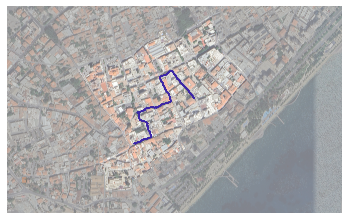

In [55]:

#filepath to save the output image with cleaned dataframe
filename_img_interpol = "goPro_file"

#put together the filepath name
filepath_img_save_goPro = filepath_img_general + "\\" + filename_img_interpol + ".png"


# Load an image from file
img = Image.open(filepath_map) 

#assign the cleaned dataframe 
df = data_goPro
df_name = "goPro file" # for printing later on plot


# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['GPS (Long.) [deg]'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['GPS (Lat.) [deg]']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image


plt.imshow(img, alpha=0.6)


# Plot flagged points in red
plt.scatter(df['x'], df['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])


#plt.title("All Exploration Sessions" + "\n" + "interpolated and flagged consecutive outliers", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name + " and calibration points", fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save_goPro, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()


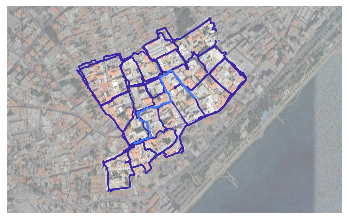

In [224]:


#filepath to save the output image with cleaned dataframe
filename_img_interpol_goPro = "interpolated_goPro_2blue"

#put together the filepath name
filepath_img_save_interpol_goPro = filepath_img_general + "\\" + filename_img_interpol_goPro + ".png"

#----------------------------------------------------------------------------------
###Plot the interpolated dataframe 

# Load an image from file
img = Image.open(filepath_map) 

#assign the cleaned dataframe 
df = df_interpol
df_name = "df_interpol_goPro" # for printing later on plot


# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['longitude'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['latitude']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image

#Mask for flagged values - flagges means over 30 seconds outlier 
flagged_mask = df['flagged']

# Mask for calibration points
calibration_mask = df['calibration']

plt.imshow(img, alpha=0.6)


# Plot flagged points in red
plt.scatter(df[flagged_mask]['x'], df[flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# Plot non-flagged points in blue
plt.scatter(df[~flagged_mask]['x'], df[~flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# add go pro data

long = (data_goPro['GPS (Long.) [deg]'] - corner_lon_left) * lon_to_pixel
lat = (corner_lat_top - data_goPro['GPS (Lat.) [deg]']) * lat_to_pixel

plt.scatter(long, lat, marker='o', s=1, edgecolors='none', facecolors= [0.27,0.48,0.99])

#plt.title("All Exploration Sessions" + "\n" + "interpolated and flagged consecutive outliers", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name + " and calibration points", fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save_interpol_goPro, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()

#----------------------------------------------------------------------------------


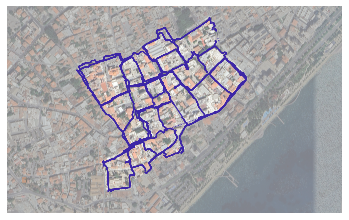

In [56]:


#filepath to save the output image with cleaned dataframe
filename_img_interpol = "all_gps"

#put together the filepath name
filepath_img_save_all = filepath_img_general + "\\" + filename_img_interpol + ".png"

#----------------------------------------------------------------------------------
###Plot the interpolated dataframe 

# Load an image from file
img = Image.open(filepath_map) 

#assign the cleaned dataframe 
df = df_interpol
df_name = "df_interpol_goPro" # for printing later on plot


# Assuming df contains 'latitude' and 'longitude' columns
# Convert GPS coordinates to pixel coordinates
df['x'] = (df['longitude'] - corner_lon_left) * lon_to_pixel
df['y'] = (corner_lat_top - df['latitude']) * lat_to_pixel


# Now, df['x'] and df['y'] contain the pixel coordinates of the GPS points on the image
# Plot these points on the map image

#Mask for flagged values - flagges means over 30 seconds outlier 
flagged_mask = df['flagged']

# Mask for calibration points
calibration_mask = df['calibration']

plt.imshow(img, alpha=0.6)


# Plot flagged points in red
plt.scatter(df[flagged_mask]['x'], df[flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# Plot non-flagged points in blue
plt.scatter(df[~flagged_mask]['x'], df[~flagged_mask]['y'], marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

# add go pro data

long = (data_goPro['GPS (Long.) [deg]'] - corner_lon_left) * lon_to_pixel
lat = (corner_lat_top - data_goPro['GPS (Lat.) [deg]']) * lat_to_pixel

plt.scatter(long, lat, marker='o', s=1, edgecolors='none', facecolors= [0.24,0.15,0.66])

#plt.title("All Exploration Sessions" + "\n" + "interpolated and flagged consecutive outliers", fontsize=7, loc="center")
# Manually position the title at the lower left corner
#plt.text(5, 5340, df_name + " and calibration points", fontsize=6, ha='left', va='top')
#plt.text(5, 5340, "top: " + str(corner_lat_top) + " " + "down: " + str(corner_lat_bottom) + " " + "left: " + str(corner_lon_left) + " " + "right: " + str(corner_lon_right), fontsize=6, ha='left', va='bottom')

# Hide the axes
plt.axis("off")

# Save the figure as an image with a specific DPI
plt.savefig(filepath_img_save_all, dpi=600, bbox_inches = "tight")  # Set the output file and resolution (dpi)

plt.show()

#----------------------------------------------------------------------------------


5.999062012639645
3.853901468804847


,time,latitude,longitude,distances,time_passed,dist_time,km_h,Q,ns,flagged,calibration,x,y
0,2023-09-05 09:04:50.200,NaN,NaN,NaN,NaN,NaN,NaN,5,6,False,False,NaN,NaN
1,2023-09-05 09:04:50.400,34.675567,33.043290,15.419161,200.0,0.077096,2.775449,2,7,False,False,3774.371518,1578.895315
2,2023-09-05 09:04:50.600,34.675568,33.043289,25.149121,200.0,0.125746,4.526842,2,7,False,False,3773.917822,1577.863504
3,2023-09-05 09:04:50.800,34.675570,33.043288,15.608600,200.0,0.078043,2.809548,2,6,False,False,3773.021152,1576.258104
4,2023-09-05 09:04:51.000,34.675571,33.043287,29.909847,200.0,0.149549,5.383772,2,7,False,False,3772.346974,1575.336786


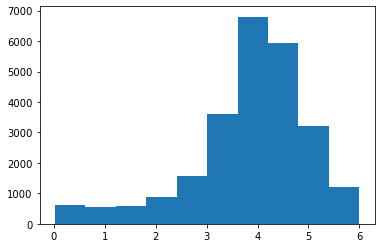

In [81]:
# plot walking speed
print(np.nanmax(df_interpol[~flagged_mask]['km_h']))
print(np.nanmean(df_interpol[~flagged_mask]['km_h']))

testSpeed = df_interpol[~flagged_mask]["km_h"] > 6



# plt.bar([1,2],[sum(testSpeed),sum(~testSpeed)])

plt.hist(df_interpol[~flagged_mask]["km_h"])

df_interpol.head()


# load vr data for walking speed plots

In [126]:
import copy  # copy big/deep objects by value
import csv
import datetime  # datetime operations
import itertools  # operate with iterators
import json  # read/write from/into json format
import math
import os  # OS operations (read/write files/folders)
import sys
import time
import warnings  # hide warnings
from collections import Counter
from itertools import groupby
import matplotlib

# process parallelization
from multiprocessing import Manager, Pool, RawArray, cpu_count
from os.path import exists

import matplotlib.pyplot as plt  # mother of plots focr Python

# import mlxtend
import numpy as np  # array/matrix operations (e.g. linear algebra)
import pandas as pd  # operate with dataframes
import pyxdf  # read XDF files (LSL streams recordings)

import scipy.stats
import seaborn as sns  # matplotlib plotting nice with shortcuts
from IPython.display import Markdown, display  # print nicely
from ipywidgets import IntProgress
#from matplotlib.pyplot import cm
from scipy.signal import savgol_coeffs
from tqdm.notebook import tqdm, trange  # mother of progressbars
from scipy.stats import ks_2samp
from multiprocessing import Pool, cpu_count

import scipy.signal

In [128]:
# warnings.simplefilter(action="ignore", category=FutureWarning)

# raw and processed data paths
# PATH_RAW = "C:/Users/schmi/Documents/PhD_Osnabruck_University/SpaRe-VR/Spare-VR-EEG/27.07.23/data"
# PATH_PROC = "C:/Users/schmi/Documents/PhD_Osnabruck_University/SpaRe-VR/Spare-VR-EEG/EEG_Data_Skripte_Debbie/Events"
# PATH_FOREYE = "C:/Users/schmi/Documents/PhD_Osnabruck_University/SpaRe-VR/Spare-VR-EEG/EEG_Data_Skripte_Debbie/ET_Output_MAD-sacc"
# PATH_TRG = "C:/Users/schmi/Documents/PhD_Osnabruck_University/SpaRe-VR/Spare-VR-EEG/EEG_Data_Skripte_Debbie/TriggerFiles_fEEG"


# specify decimals format on pandas tables
# pd.options.display.float_format = "{:.5f}".format

# inline static plotting (default)
%matplotlib inline
# interactive plotting
# %matplotlib widget

# progress bar customized format
B_FORMAT = """📄 {n_fmt} of {total_fmt} {desc} processed: {bar} 
            {percentage:3.0f}% ⏱️{elapsed} ⏳{remaining} ⚙️{rate_fmt}{postfix}"""


CORES = cpu_count()  # number of cpu threads for multiprocessing
print(f"Total CPU threads: {CORES}")


def pbar_fork_hack():
    """
    Hack to enforce progress bars to be displayed by fork processes on
    IPython Apps like Jupyter Notebooks.

    Avoids [IPKernelApp] WARNING | WARNING: attempted to send message from fork

    Important: pass this function as argument for the initializer parameter
    while initializing a multiprocessing pool to make it work. E.g.:

    pool = Pool(processes=N_CORES, initializer=pbar_fork_hack)

    Source:
     - https://github.com/ipython/ipython/issues/11049#issue-306086846
     - https://github.com/tqdm/tqdm/issues/485#issuecomment-473338308
    """
    print(" ", end="", flush=True)

Total CPU threads: 8


In [121]:
# Participant list of all participants that participated 5 sessions x 30 min
# in Westbrook city
PartList = [365, 1754, 2258, 2693, 3310, 4176, 4597, 4796, 4917, 5741, 6642, 7093, 7264, 7412, 7842, 8007, 8469, 8673, 9472, 9502, 9586, 9601]

print(len(PartList),'participants') 

22 participants


In [122]:
# datapath = "F:\\WestbrookProject\\Spa_Re\\control_group\\pre-processing_2023\\velocity_based\\step1_dupl_interp_smooth"
datapath = "F:\\WestbrookProject\\HumanA_Data\\Experiment1\\Exploration_short\\pre-processing\\velocity_based\\step1_dupl_clean_smooth"
savepath = "F:\\Cyprus_project_overview\\data\\analysis\\walkingSpeed"


In [158]:
file = "1754_Session_1_ET_1_data_dupl_clean_smooth.csv"
dataVR = pd.read_csv(os.path.join(datapath, file))

In [182]:
# Define a function to calculate Euclidean distance between two points
def euclidean_distance(row1, row2):
#     return np.sqrt((row2['hmdPosition_x'] - row1['hmdPosition_x'])**2 + 
#                    (row2['hmdPosition_y'] - row1['hmdPosition_y'])**2 + 
#                    (row2['hmdPosition_z'] - row1['hmdPosition_z'])**2)

    return np.sqrt((row2['playerBodyPosition_x'] - row1['playerBodyPosition_x'])**2 + 
                   (row2['playerBodyPosition_z'] - row1['playerBodyPosition_z'])**2)

In [183]:
def calc_walkingSpeed(df):


    
    # Calculate the distance between consecutive rows
    distances = []
    for i in range(len(df) - 1):
        distance = euclidean_distance(df.iloc[i], df.iloc[i + 1])
        distances.append(distance)
    
    
    # Add distances as a new column in DataFrame (with NaN for the last row)
    df['distances_m'] = [np.nan] + distances

    # Calculate time differences between rows
    df['time_diff'] = df['timeStampDataPointStart_converted'].diff().fillna(0)

    # Calculate speed in km/h
    # Speed (km/h) = (Distance (meters) / Time (seconds)) * 3.6
    df['speed_kmh'] = (df['distances_m']/df['time_diff']) * 3.6
    df['speed_kmh'].fillna(0, inplace=True)  # Fill NaN values (if any) with 0 for the first row

    return df
    
    

In [184]:

def calc_walkingSpeed1sec(df):
    # Create a mask to select every 90th row
    mask = np.zeros(len(df), dtype=bool)
    rate = 45
    mask[::rate] = True
    
    # Apply the mask to filter the DataFrame
    df_filtered = df[mask]
    
    # Calculate the distance between consecutive rows in the filtered DataFrame
    distances = []
    for i in range(len(df_filtered) - 1):
        distance = euclidean_distance(df_filtered.iloc[i], df_filtered.iloc[i + 1])
        distances.append(distance)
    
    # Add distances as a new column in the filtered DataFrame (with NaN for the last row)
    df_filtered['distances_m'] = [np.nan] + distances
    
    # Calculate time differences between rows in the filtered DataFrame
    df_filtered['time_diff'] = df_filtered['timeStampDataPointStart_converted'].diff().fillna(0)
    
    # Calculate speed in km/h
    # Speed (km/h) = (Distance (meters) / Time (seconds)) * 3.6
    df_filtered['speed_kmh'] = (df_filtered['distances_m'] / df_filtered['time_diff']) * 3.6
    df_filtered['speed_kmh'].fillna(0, inplace=True)  # Fill NaN values (if any) with 0 for the first row
    
    # Return only the speed values
    return df_filtered['speed_kmh'].values

In [114]:
# # Display head horizontally
with pd.option_context('display.max_columns', None):
#     display(data_head)
    display(dataVR.iloc[:10])

,timeStampDataPointStart,timeStampDataPointEnd,timeStampGetVerboseData,eyeOpennessLeft,eyeOpennessRight,pupilDiameterMillimetersLeft,pupilDiameterMillimetersRight,leftGazeValidityBitmask,rightGazeValidityBitmask,combinedGazeValidityBitmask,eyePositionCombinedWorld_x,eyePositionCombinedWorld_y,eyePositionCombinedWorld_z,eyeDirectionCombinedWorld_x,eyeDirectionCombinedWorld_y,eyeDirectionCombinedWorld_z,eyeDirectionCombinedLocal_x,eyeDirectionCombinedLocal_y,eyeDirectionCombinedLocal_z,eyePositionLeftWorld_x,eyePositionLeftWorld_y,eyePositionLeftWorld_z,eyeDirectionLeftWorld_x,eyeDirectionLeftWorld_y,eyeDirectionLeftWorld_z,eyeDirectionLeftLocal_x,eyeDirectionLeftLocal_y,eyeDirectionLeftLocal_z,eyePositionRightWorld_x,eyePositionRightWorld_y,eyePositionRightWorld_z,eyeDirectionRightWorld_x,eyeDirectionRightWorld_y,eyeDirectionRightWorld_z,eyeDirectionRightLocal_x,eyeDirectionRightLocal_y,eyeDirectionRightLocal_z,hmdPosition_x,hmdPosition_y,hmdPosition_z,hmdDirectionForward_x,hmdDirectionForward_y,hmdDirectionForward_z,hmdDirectionRight_x,hmdDirectionRight_y,hmdDirectionRight_z,hmdRotation_x,hmdRotation_y,hmdRotation_z,hmdDirectionUp_x,hmdDirectionUp_y,hmdDirectionUp_z,handLeftPosition_x,handLeftPosition_y,handLeftPosition_z,handRightPosition_x,handRightPosition_y,handRightPosition_z,handRightRotation_x,handRightRotation_y,handRightRotation_z,handRightDirectionForward_x,handRightDirectionForward_y,handRightDirectionForward_z,handRightDirectionRight_x,handRightDirectionRight_y,handRightDirectionRight_z,handRightDirectionUp_x,handRightDirectionUp_y,handRightDirectionUp_z,playerBodyPosition_x,playerBodyPosition_y,playerBodyPosition_z,bodyTrackerPosition_x,bodyTrackerPosition_y,bodyTrackerPosition_z,bodyTrackerRotation_x,bodyTrackerRotation_y,bodyTrackerRotation_z,hitObjectColliderName_1,ordinalOfHit_1,hitColliderType_1,hitPointOnObject_x_1,hitPointOnObject_y_1,hitPointOnObject_z_1,hitObjectColliderBoundsCenter_x_1,hitObjectColliderBoundsCenter_y_1,hitObjectColliderBoundsCenter_z_1,hitObjectColliderName_2,ordinalOfHit_2,hitColliderType_2,hitPointOnObject_x_2,hitPointOnObject_y_2,hitPointOnObject_z_2,hitObjectColliderBoundsCenter_x_2,hitObjectColliderBoundsCenter_y_2,hitObjectColliderBoundsCenter_z_2,DataRow,hitObjectColliderisGraffiti_1,hitObjectColliderisGraffiti_2,processedCollider_name,processedCollider_type,processedCollider_hitPointOnObject_x,processedCollider_hitPointOnObject_y,processedCollider_hitPointOnObject_z,processedCollider_hitObjectColliderBoundsCenter_x,processedCollider_hitObjectColliderBoundsCenter_y,processedCollider_hitObjectColliderBoundsCenter_z,replacedRows,processedColliderIsNH,processedCollider_NH_name,processedCollider_NH_type,processedCollider_NH_hitPointOnObject_x,processedCollider_NH_hitPointOnObject_y,processedCollider_NH_hitPointOnObject_z,processedCollider_NH_hitObjectColliderBoundsCenter_x,processedCollider_NH_hitObjectColliderBoundsCenter_y,processedCollider_NH_hitObjectColliderBoundsCenter_z,replacedRows_NH,processedCollider_NH_IsNH,timeStampDataPointStart_converted,cleanData,isBlink,original_processedCollider_hitPointOnObject_x,original_processedCollider_hitPointOnObject_y,original_processedCollider_hitPointOnObject_z,original_processedCollider_NH_hitPointOnObject_x,original_processedCollider_NH_hitPointOnObject_y,original_processedCollider_NH_hitPointOnObject_z,removedData,interpolated,interpolatedHitPoint
0,1.646740e+09,1.646740e+09,1.646740e+09,0.736757,1.000000,4.519638,4.095291,31,31,3,-59.118717,2.431223,34.731087,-0.102345,-0.045305,0.993701,0.053696,-0.010223,0.998489,-59.082672,2.433652,34.732132,-0.089214,-0.041129,0.995159,0.067017,-0.006485,0.997726,-59.151230,2.429129,34.730198,-0.114100,-0.049049,0.992245,0.041748,-0.013580,0.999023,-59.117783,2.425328,34.760147,-0.155956,-0.036818,0.987078,0.987091,0.031066,0.157117,2.109967,351.021606,1.781420,-0.036449,0.998839,0.031497,-59.099869,0.858863,34.795731,-59.137802,1.745421,34.994965,340.637909,350.276398,342.978027,-0.159343,0.331537,0

In [167]:
dataVR = calc_walkingSpeed(dataVR)
speed = dataVR['speed_kmh'].values
print(speed[10:15])

dataVR.head()

KeyboardInterrupt: 

In [185]:
speed2 = calc_walkingSpeed1sec(dataVR)


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

11.458837684685847
15.540890015304939


(array([175.,  24.,  37.,  28.,  45.,  41.,  26.,  32.,  46., 415.]),
 array([ 0.        ,  1.80257407,  3.60514813,  5.4077222 ,  7.21029627,
         9.01287034, 10.8154444 , 12.61801847, 14.42059254, 16.2231666 ,
        18.02574067]),
 <BarContainer object of 10 artists>)

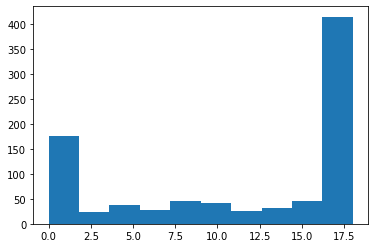

In [186]:
print(np.nanmean(speed2))
print(np.nanmedian(speed2))

plt.hist(speed2)

In [188]:
print('start')
# walking speed lists

allWalkingSpeeds = []
allWalkingSpeed_means = [];

# useful overviews
noFilePartList = [len(PartList)]
missingFiles = pd.DataFrame(columns=['Participant', 'Session'])



# loop code over all participants in participant list
parts_pbar = tqdm(
    iterable=PartList,
    total=len(PartList),
    desc="participants",
    dynamic_ncols=True,
    bar_format=B_FORMAT,
)

for indexPart, currentPart in enumerate(parts_pbar):
#     currentPart = PartList[indexPart]
    print(f'Participant {indexPart} - participant ID {currentPart}')
    
    sessions = list(range(1,6))
#     sessions = list(range(2,3))
    
    session_pbar = tqdm(
        iterable=sessions,
        total=len(sessions),
        desc="sessions________",
        dynamic_ncols=True,
        bar_format=B_FORMAT,
    )
    
    
    # loop over recording sessions (should be 5 for each participant)
#     for indexSess in range(1, 6):
#     for indexSess in range(1, 2):
    for indexSess in session_pbar:
        
        speed_part = []

        # get all eye tracking sessions and loop over them (amount of ET files can vary)
        fileNames = [f for f in os.listdir(datapath) if f.startswith(f'{currentPart}_Session_{indexSess}') and f.endswith('_data_dupl_clean_smooth.csv')]
#         print(dirSess)
#         print(f'Session {indexSess}')
        
        if len(fileNames)< 3:
            hMF = pd.DataFrame({'Participant': [currentPart], 'Session': [indexSess], 'onlyExistingFilesInSession': [fileNames]})
            missingFiles = pd.concat([missingFiles, hMF], ignore_index=True)
            

        # runs if files exist

############ Main part starts here ######################################################################################
        # To use it for later!!!
        # based on remodnav --> has almost the same length as our filter

        # files progress bar
        file_pbar = tqdm(
            iterable=fileNames,
            total=len(fileNames),
            desc="📂 ET files____________",
            dynamic_ncols=True,
            bar_format=B_FORMAT,
        )



            # loop necessary for displaying properly the progressbar with multiprocessing
            # source: https://stackoverflow.com/a/40133278

#             info_list = []

        for file in file_pbar:

            print('process file ', file)

            # read in data
            dataVR = pd.read_csv(os.path.join(datapath, file))
            
            speed = calc_walkingSpeed1sec(dataVR)
           
            

            allWalkingSpeeds.extend(speed)  # Append speeds to the global list
            speed_part.extend(speed)  # Append speeds for the current session
            
            del dataVR 

        # Calculate mean speed for the current session and store it
        if speed_part:  # Check if the list is not empty
            mean_speed = np.nanmean(speed_part)
            allWalkingSpeed_means.append(mean_speed)
            
        


if len(missingFiles)>0:
    
    print("missing files detected")
    print(missingFiles)
    
else:
    print("All files were found")


start


📄 0 of 22 participants processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

Participant 0 - participant ID 365


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_1_ET_1_data_dupl_clean_smooth.csv


D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Software\Programme\Anaconda3\envs\graphs\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

process file  365_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  365_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  365_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  365_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  365_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 1 - participant ID 1754


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 2 - participant ID 2258


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 3 - participant ID 2693


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 4 - participant ID 3310


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_4_ET_3_data_dupl_clean_smooth.csv
process file  3310_Session_4_ET_4_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 5 - participant ID 4176


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 6 - participant ID 4597


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 7 - participant ID 4796


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 8 - participant ID 4917


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 9 - participant ID 5741


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_4_ET_3_data_dupl_clean_smooth.csv
process file  5741_Session_4_ET_4_data_dupl_clean_smooth.csv


📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_5_ET_3_data_dupl_clean_smooth.csv
process file  5741_Session_5_ET_4_data_dupl_clean_smooth.csv
Participant 10 - participant ID 6642


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 11 - participant ID 7093


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 12 - participant ID 7264


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_3_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_4_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 13 - participant ID 7412


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 14 - participant ID 7842


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 15 - participant ID 8007


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 16 - participant ID 8469


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_3_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_4_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 17 - participant ID 8673


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 18 - participant ID 9472


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 19 - participant ID 9502


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 20 - participant ID 9586


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_5_ET_3_data_dupl_clean_smooth.csv
Participant 21 - participant ID 9601


📄 0 of 5 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_1_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_2_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_2_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_2_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_3_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_3_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_3_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_4_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_4_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_4_ET_3_data_dupl_clean_smooth.csv


📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_5_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_5_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_5_ET_3_data_dupl_clean_smooth.csv
All files were found


In [157]:
print(allWalkingSpeed_means)
print(len(allWalkingSpeeds))
print(file)

print(len(speeds))
            
# dataVR = calc_walkingSpeed(dataVR)

# speed = dataVR['speed_kmh'].values

# allWalkingSpeeds = [allWalkingSpeeds + speed]
# speed_part = speed_part + speed

# print(len(allWalkingSpeed_means))
# print(len(allWalkingSpeeds))

[16.83743002586402]
154900
365_Session_2_ET_2_data_dupl_clean_smooth.csv
54024


In [148]:
allWalkingSpeeds = []
allWalkingSpeeds.append(speed)
# speed_part = speed_part + speed
print(len(speed))
print(type(speed))
print(len(allWalkingSpeeds))

39094
<class 'numpy.ndarray'>
1


## walking distances in VR after 40 min


In [189]:
def calc_walkingDist(df):


    
    # Calculate the distance between consecutive rows
    distances = []
    for i in range(len(df) - 1):
        distance = euclidean_distance(df.iloc[i], df.iloc[i + 1])
        distances.append(distance)
    
    
    # Add distances as a new column in DataFrame (with NaN for the last row)
    distances_m = [np.nan] + distances

 

    return distances_m
    
    

In [223]:
print('start')
# walking speed lists

allWalkingDistances_40min = []
allWalkingDistances_10min = []

# useful overviews
noFilePartList = [len(PartList)]
missingFiles = pd.DataFrame(columns=['Participant', 'Session'])



# loop code over all participants in participant list
parts_pbar = tqdm(
    iterable=PartList,
    total=len(PartList),
    desc="participants",
    dynamic_ncols=True,
    bar_format=B_FORMAT,
)

for indexPart, currentPart in enumerate(parts_pbar):
    counter = 0
#     currentPart = PartList[indexPart]
    print(f'Participant {indexPart} - participant ID {currentPart}')
    
    sessions = list(range(1,2))
#     sessions = list(range(2,3))
    
    session_pbar = tqdm(
        iterable=sessions,
        total=len(sessions),
        desc="sessions________",
        dynamic_ncols=True,
        bar_format=B_FORMAT,
    )
    
    
    # loop over recording sessions (should be 5 for each participant)
#     for indexSess in range(1, 6):
#     for indexSess in range(1, 2):
    for indexSess in session_pbar:
        
        dist_part = []

        # get all eye tracking sessions and loop over them (amount of ET files can vary)
        fileNames = [f for f in os.listdir(datapath) if f.startswith(f'{currentPart}_Session_{indexSess}') and f.endswith('_data_dupl_clean_smooth.csv')]
#         print(dirSess)
#         print(f'Session {indexSess}')
        
        if len(fileNames)< 3:
            hMF = pd.DataFrame({'Participant': [currentPart], 'Session': [indexSess], 'onlyExistingFilesInSession': [fileNames]})
            missingFiles = pd.concat([missingFiles, hMF], ignore_index=True)
            

        # runs if files exist

############ Main part starts here ######################################################################################
        # To use it for later!!!
        # based on remodnav --> has almost the same length as our filter

        # files progress bar
        

        
        if indexSess == 1:
            file_pbar = tqdm(
                iterable=fileNames,
                total=len(fileNames),
                desc="📂 ET files____________",
                dynamic_ncols=True,
                bar_format=B_FORMAT,
            )

        else:
            file_pbar = tqdm(
                iterable=fileNames,
                total=1,
                desc="📂 ET files____________",
                dynamic_ncols=True,
                bar_format=B_FORMAT,
            )




            # loop necessary for displaying properly the progressbar with multiprocessing
            # source: https://stackoverflow.com/a/40133278

#             info_list = []

        for file in file_pbar:

            print('process file ', file)
            counter += 1

            # read in data
            dataVR = pd.read_csv(os.path.join(datapath, file))
            
            dist = calc_walkingDist(dataVR)
            
            sumDist = sum(x for x in dist if not math.isnan(x))
            
            if (indexSess ==1) and (counter == 1):
                allWalkingDistances_10min.append(sumDist)

            dist_part.append(sumDist)  # Append speeds to the global list
            
            del dataVR 

        # Calculate mean speed for the current session and store it
        if dist_part:  # Check if the list is not empty
            sumDist_part = sum(dist_part)
            allWalkingDistances_40min.append(sumDist_part)
            
        


if len(missingFiles)>0:
    
    print("missing files detected")
    print(missingFiles)
    
else:
    print("All files were found")


start


📄 0 of 22 participants processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

Participant 0 - participant ID 365


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  365_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  365_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  365_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 1 - participant ID 1754


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  1754_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  1754_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  1754_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 2 - participant ID 2258


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2258_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  2258_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  2258_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 3 - participant ID 2693


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  2693_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  2693_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  2693_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 4 - participant ID 3310


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  3310_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  3310_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  3310_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 5 - participant ID 4176


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4176_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4176_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4176_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 6 - participant ID 4597


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4597_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4597_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4597_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 7 - participant ID 4796


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4796_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4796_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4796_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 8 - participant ID 4917


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  4917_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  4917_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  4917_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 9 - participant ID 5741


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  5741_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  5741_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  5741_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 10 - participant ID 6642


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  6642_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  6642_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  6642_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 11 - participant ID 7093


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7093_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7093_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7093_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 12 - participant ID 7264


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7264_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_3_data_dupl_clean_smooth.csv
process file  7264_Session_1_ET_4_data_dupl_clean_smooth.csv
Participant 13 - participant ID 7412


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7412_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7412_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7412_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 14 - participant ID 7842


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  7842_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  7842_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  7842_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 15 - participant ID 8007


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8007_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8007_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8007_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 16 - participant ID 8469


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 4 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8469_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_3_data_dupl_clean_smooth.csv
process file  8469_Session_1_ET_4_data_dupl_clean_smooth.csv
Participant 17 - participant ID 8673


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  8673_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  8673_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  8673_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 18 - participant ID 9472


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9472_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9472_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9472_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 19 - participant ID 9502


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9502_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9502_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9502_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 20 - participant ID 9586


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9586_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9586_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9586_Session_1_ET_3_data_dupl_clean_smooth.csv
Participant 21 - participant ID 9601


📄 0 of 1 sessions________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

📄 0 of 3 📂 ET files____________ processed:            
              0% ⏱️00:00 ⏳? ⚙️?it/s

process file  9601_Session_1_ET_1_data_dupl_clean_smooth.csv
process file  9601_Session_1_ET_2_data_dupl_clean_smooth.csv
process file  9601_Session_1_ET_3_data_dupl_clean_smooth.csv
All files were found


In [225]:
print(len(allWalkingDistances_10min))
print(len(allWalkingDistances_40min))

22
22


In [205]:
# Try out block for cleaning and interpolating 

def speed(df):
    
    """
    iterate through dataframe and calculate the distance from one timestamp to the next
    
    calculate the mean and median of the distances depending on the given Q values 
    
    build the new dataframe and include the column distance 
    
    

    """
    #create empty lists
    list_dist = []
    list_lat = []
    list_long = []
    list_time = []
    list_Q = []
    list_ns = []
    list_time_passed = []
    list_dist_div_time = []
    list_km_h = []
    list_flagged = []
    list_calibration = []
    
    #iterate through length of dataframe (-1 because you use i+1)
    for i, row in df.iloc[:len(df)-1].iterrows():
        #define points 
        point1 = df.latitude[i], df.longitude[i]
        point2 = df.latitude[i+1], df.longitude[i+1]
        #earth radius
        radius = 6371 #km 
        
        #define two points
        lat1, lon1 = point1
        lat2, lon2 = point2
        
        #Haversine distance formula 
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
            * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c
        e = d * 1000 # to give result in meters
        f = e * 100 # tp give result in centimeters
        
        #calculate the time passed from one to the next timestamp 
        t_timestamp = df.time[i+1] - df.time[i]
        #convert it to float (and milliseconds)
        t = t_timestamp.total_seconds() * 1000
        
        #divide distance by time passed
        dist_div_time = f/t        
        
        #calculate dist/time to from cm/ms to km/h
        speed_km_h = dist_div_time * 36
        
        #assign the flagged as false
        flagged = False
        
        #add calibration point for plotting 
        if i==1 or i==len(df)-2: 
            calibration = True
        else:
            calibration = False
            
        
                         
        
        #create result lists calculated distances, latitude, longitude
        list_dist.append(f)
        list_lat.append(df.latitude[i])
        list_long.append(df.longitude[i])
        list_time.append(df.time[i])
        list_Q.append(df.Q[i])
        list_ns.append(df.ns[i])
        list_time_passed.append(t)
        list_dist_div_time.append(dist_div_time)
        list_km_h.append(speed_km_h)
        list_flagged.append(flagged)
        list_calibration.append(calibration)
        
        
    #create pandas series 
    se_dist = pd.Series(list_dist, name = "distances")
    se_lat = pd.Series(list_lat, name = "latitude")
    se_long = pd.Series(list_long, name = "longitude")
    se_time = pd.Series(list_time, name = "time")
    se_Q = pd.Series(list_Q, name = "Q")
    se_ns = pd.Series(list_ns, name = "ns")
    se_time_passed = pd.Series(list_time_passed, name = "time_passed")
    se_dist_div_time = pd.Series(list_dist_div_time, name = "dist_time")
    se_km_h = pd.Series(list_km_h, name = "km_h")
    se_flagged = pd.Series(list_flagged, name = "flagged")
    se_calibration = pd.Series(list_calibration, name = "calibration")
    

    
    #create dataframe from series 
    df_distances = pd.concat([se_time, se_lat, se_long, se_dist, se_time_passed, se_dist_div_time, se_km_h, se_Q, se_ns, se_flagged, se_calibration], axis=1)
    
    return df_distances


#concat the dataframes with the speed of all recording sessions
df_concated_speed_40min = pd.concat([df_conc_speed_1_1,
                               df_conc_speed_1_2,
                               df_conc_speed_1_3,
                               df_conc_speed_2_1
                               ], ignore_index=True)

#---------------------------------------------------------------------------
def flag_consecutive_outliers(df, consecutive_limit=150): 
    """
    this function checks for consecutive outliers which would not pass the set 
    thresholds regarding speed, Q value, number of satellites 
    
    if there are parts of the data with consecutive 150 outlier rows, adding up
    to 30 seconds of recording, those parts are flagged, to be skipped later
    
    """
    count = 0
    flag = False
    flagged_indices = []

    for i in range(len(df)):
        if df['Q'][i] == 5 or df["ns"][i] < 5 or df["km_h"][i] > 6:
            count += 1
            if count >= consecutive_limit:
                if not flag:
                    flag = True
                    start_index = i - count + 1
                flagged_indices.extend(range(start_index, i + 1))
        else:
            count = 0
            flag = False

    df['flagged'] = False
    df.loc[flagged_indices, 'flagged'] = True

    return df


df_flagged_40min = flag_consecutive_outliers(df_concated_speed_40min)


#--------------------------------------------------------------------------
def clean(df):
    """
    cleanes the given dataframe by requirements
    sets values to nan, if requirements are met
    
    """
    flagged_indices = df[df['flagged']].index  # Get indices of flagged rows
   
     
    for i in range(0,len(df)-1):
        # Skip rows with flagged indices
        if i in flagged_indices:
            continue
        
        #cleaning
        if df.Q[i] == 5 or df.km_h[i] >= 6 or df.ns[i] < 5:
            # Set specific columns to None when Q is 5
            df.loc[i, 'latitude'] = np.nan
            df.loc[i, 'longitude'] = np.nan
            df.loc[i, "distances"] = np.nan
            df.loc[i, "time_passed"] = np.nan
            df.loc[i, "dist_time"] = np.nan
            df.loc[i, "km_h"] = np.nan
    
    return df

#assign outside function
df_conc_clean_40min = clean(df_flagged_40min)
#make copy such that original df is not changed when interpolated
df_conc_clean_copy_40min = df_conc_clean_40min.copy()

#----------------------------------------------------------------------------

def interpol(df):
    """
    linearly interpolates the given dataframe 
    
    """
    df['latitude'] = df['latitude'].interpolate(method='linear')
    df['longitude'] = df['longitude'].interpolate(method='linear')
    
    return df


#assign outside function, use copy
df_interpol_40min = interpol(df_conc_clean_copy_40min)


#-----------------------------------------------------------------------------------


In [209]:
flagged_mask_40min = df_interpol_40min['flagged']

print(len(df_interpol_40min[~flagged_mask_40min]))
print(len(df_interpol_40min))
print(len(df_interpol_40min[~flagged_mask_40min])/len(df_interpol_40min))



distance_realWold_40min = df_interpol_40min[~flagged_mask_40min]['distances'].sum()
print(distance_realWold_40min/100)

11388
11579
0.9835046204335435
1807.847405163715


In [247]:
savepath_walkingPaths = "F:\\Cyprus_project_overview\\data\\comparison2VR\\walkingPaths_HA"

plot_name = "walkingDistance_compVR.png"

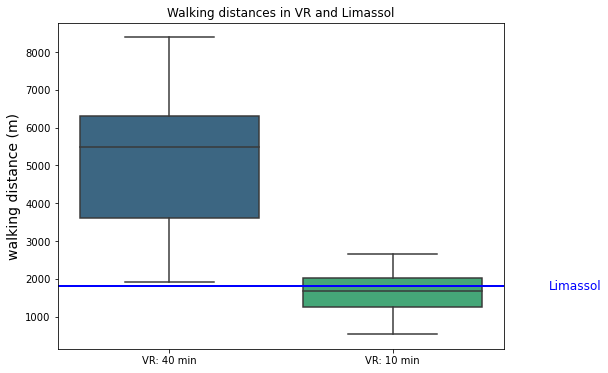

In [281]:
distanceLimassol = distance_realWold_40min/100

df_distance = pd.DataFrame({
    'VR: 40 min': allWalkingDistances_40min, 
    'VR: 10 min': allWalkingDistances_10min})

plt.figure(figsize=(8, 6))

ax = sns.boxplot(data=df_distance, palette='viridis')

# Add a horizontal line representing the Limassol value
plt.axhline(y=distanceLimassol, color='blue', linestyle='-', linewidth=2)

# Add a label next to the axline
x_label_position = len(df_distance.columns) - 0.5  # Adjust position for label
plt.text(x=x_label_position +0.2, y=distanceLimassol, s='Limassol', color='blue', fontsize=12, verticalalignment='center')

# Add labels and title
plt.ylabel('walking distance (m)', fontsize=14)
plt.title('Walking distances in VR and Limassol', fontsize=12)

# save plot

full_path = os.path.join(savepath_walkingPaths, plot_name)

plt.savefig(full_path, dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

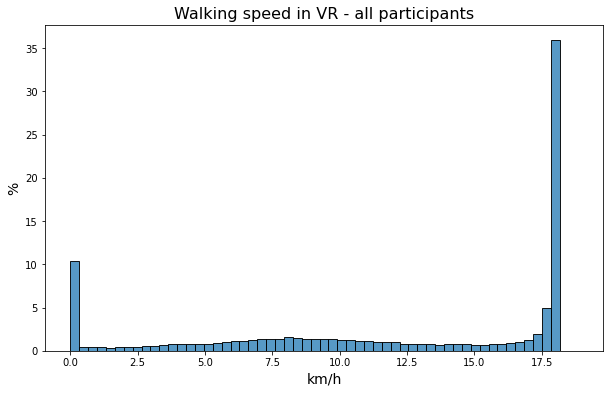

In [261]:
# Example data

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(allWalkingSpeeds,kde=False, stat='percent')


# Add labels and title
plt.xlabel('km/h', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.title('Walking speed in VR - all participants', fontsize=16)

full_path = os.path.join(savepath_walkingPaths, "walkingSpeed_VR_allParticipants.png")

plt.savefig(full_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

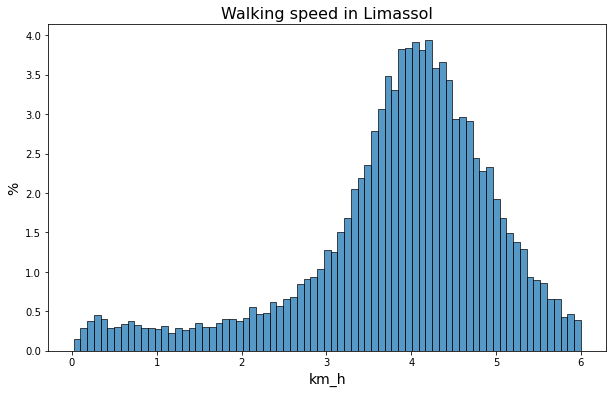

In [262]:
speed_realWold_40min = df_interpol[~flagged_mask]['km_h']

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(speed_realWold_40min,kde=False, stat='percent')


# Add labels and title
plt.xlabel('km_h', fontsize=14)
plt.ylabel('%', fontsize=14)
plt.title('Walking speed in Limassol', fontsize=16)

full_path = os.path.join(savepath_walkingPaths, "walkingSpeed_Limassol.png")

plt.savefig(full_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

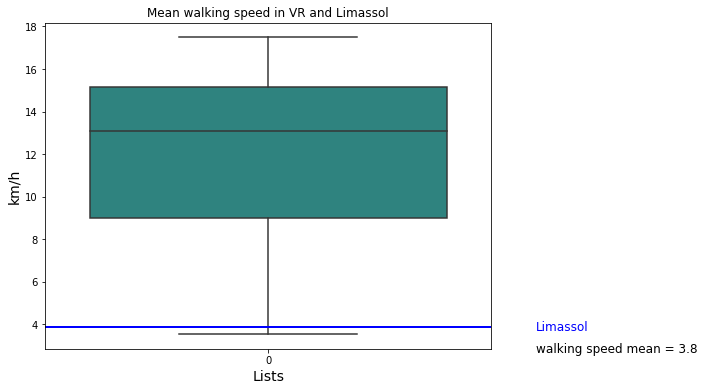

In [282]:
walkingSpeed_mean_limassol = np.nanmean(speed_realWold_40min)

plt.figure(figsize=(8, 6))

ax = sns.boxplot(data=allWalkingSpeed_means, palette='viridis')

# Add a horizontal line representing the Limassol value
plt.axhline(y=walkingSpeed_mean_limassol, color='blue', linestyle='-', linewidth=2)

# Add a label next to the axline
plt.text(x=0.6, y=walkingSpeed_mean_limassol, s='Limassol', color='blue', fontsize=12, verticalalignment='center')
plt.text(x=0.6, y=walkingSpeed_mean_limassol-1, s='walking speed mean = 3.8', color='black', fontsize=12, verticalalignment='center')


# Add labels and title
plt.xlabel('Lists', fontsize=14)
plt.ylabel('km/h', fontsize=14)
plt.title('Mean walking speed in VR and Limassol', fontsize=12)

# save plot

full_path = os.path.join(savepath_walkingPaths, "mean_walking_speeds")

plt.savefig(full_path, dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

NameError: name 'data' is not defined